In [26]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from adaptive import Learner1D, runner
from adaptive.learner.learner1D import curvature_loss_function

(356, 2)


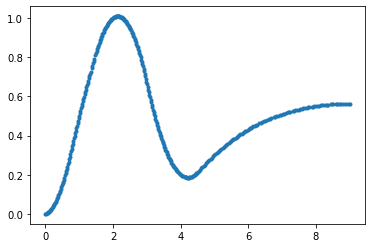

In [30]:
data = np.array([
    [0, 0],
    [0.5, 0.15],
    [1, 0.5],
    [2, 1],
    [4, 0.2],
    [5, 0.3],
    [8, 0.55],
    [9, 0.56]
])
spl = interpolate.InterpolatedUnivariateSpline(data[:, 0], data[:, 1], k=2)

learner = Learner1D(lambda x : spl(x), (0, 9), loss_per_interval=curvature_loss_function())
goal = lambda x : x.loss() < 1e-3
runner.simple(learner, goal)
    
plot_data = np.array(list(learner.data.items()))
sorted_data = plot_data[np.argsort(plot_data[:, 0])]

plt.figure()
plt.plot(sorted_data[:,0], sorted_data[:,1], '.')

print (sorted_data.shape)
np.savetxt("hype_cycle.dat", sorted_data)